In [16]:
import pandas as pd

In [17]:
salmon_quants = pd.read_csv('salmon_output/quant.sf', delimiter='\t')
# rename column Name to target_id and TPM to tpm_salmon
salmon_quants = salmon_quants.rename(columns={'Name': 'target_id', 'TPM': 'tpm_salmon'})
# only keep column Name and TPM
salmon_quants = salmon_quants[['target_id', 'tpm_salmon']]
salmon_quants

,target_id,tpm_salmon
0,ENST00000415118.1,0.00000
1,ENST00000448914.1,0.00000
2,ENST00000434970.2,0.00000
3,ENST00000631435.1,0.00000
4,ENST00000710614.1,0.00000
...,...,...
192820,ENST00000569984.1,0.00000
192821,ENST00000624828.1,0.00000
192822,ENST00000436045.1,0.00000
192823,ENST00000415059.1,0.00000


In [18]:
kallisto_quants = pd.read_csv('kallisto_output/abundance.tsv', delimiter='\t')
# rename column tpm to tpm_kallisto
kallisto_quants = kallisto_quants.rename(columns={'tpm': 'tpm_kallisto'})
# only keep columns target_id and tpm_kallisto
kallisto_quants = kallisto_quants[['target_id', 'tpm_kallisto']]
kallisto_quants

,target_id,tpm_kallisto
0,ENST00000415118.1,0.0000
1,ENST00000448914.1,0.0000
2,ENST00000434970.2,0.0000
3,ENST00000631435.1,0.0000
4,ENST00000632684.1,0.0000
...,...,...
205787,ENST00000436045.1,0.0000
205788,ENST00000415059.1,0.0000
205789,ENST00000637607.1,0.0000
205790,ENST00000431596.1,0.0000


In [19]:
standard_quants = pd.read_csv('ENCFF651UQG.tsv', delimiter='\t')
# rename column transcript_id to target_id and TPM to tpm_std_star
standard_quants = standard_quants.rename(columns={'transcript_id': 'target_id', 'TPM': 'tpm_std_star'})
# only keep columns target_id and tpm
standard_quants = standard_quants[['target_id', 'tpm_std_star']]
standard_quants

,target_id,tpm_std_star
0,10904,0.00
1,12954,0.00
2,12956,0.00
3,12958,0.00
4,12960,0.00
...,...,...
207502,tSpikein_ERCC-00165,8.00
207503,tSpikein_ERCC-00168,0.04
207504,tSpikein_ERCC-00170,2.52
207505,tSpikein_ERCC-00171,703.46


In [20]:
# find the intersection of the target_id columns of the 4 dataframes
intersection = pd.merge(salmon_quants, kallisto_quants, on='target_id')
intersection = pd.merge(intersection, standard_quants, on='target_id')
intersection = intersection.rename(columns={'tpm_std_star': 'tpm_std'})

In [21]:
# find the correlation between the tpm values of the 4 dataframes
correlation = intersection.corr()
correlation

,tpm_salmon,tpm_kallisto,tpm_std
tpm_salmon,1.000000,0.977776,0.894361
tpm_kallisto,0.977776,1.000000,0.898028
tpm_std,0.894361,0.898028,1.000000


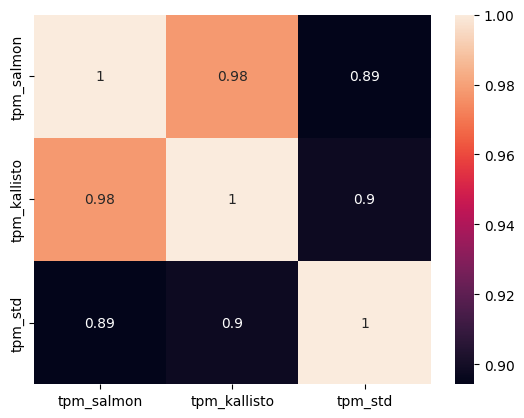

In [22]:
# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True)
plt.show()